In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
datos = pd.read_csv("../../output/data/ENE2022_proc.csv")
datos

,sexo,sexo_str,edad,edad_tr,sexo_edad,region,region_str,educa,educa_str,habituales,...,parentesco_str,empresaPaga_ciiu4_str,empresaTrabaja_ciiu4_str,empresaDueno_ciiu4_str,empresaPaga_ciiu4,empresaTrabaja_ciiu4,empresaDueno_ciiu4,hrs_diarias,dias_sem,hrs_sem
0,0,Hombre,36,Jovenes,Hombre joven,8,Región del Biobío,2.0,Educación Media,70.0,...,Hijo/a o hijastro/a,NaN,G Comercio al por mayor y al por menor; repara...,G Comercio al por mayor y al por menor; repara...,NaN,7.0,7.0,10.0,7.0,70.0
1,1,Mujer,64,Adultos,Mujer adulta,16,Región de Ñuble,4.0,Técnica completa,NaN,...,Cónyuge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Mujer,56,Adultos,Mujer adulta,6,Región de O'Higgins,1.0,Educación Básica,45.0,...,NaN,NaN,T Actividades de los hogares como empleadores;...,T Actividades de los hogares como empleadores;...,NaN,20.0,20.0,9.0,5.0,45.0
3,1,Mujer,65,Adultos mayores,Mujer mayor,6,Región de O'Higgins,1.0,Educación Básica,NaN,...,Cónyuge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Hombre,34,Jovenes,Hombre joven,1,Región de Tarapacá,5.0,Universitaria incompleta,5.0,...,Conviviente,NaN,"M Actividades profesionales, científicas y tec...","M Actividades profesionales, científicas y tec...",NaN,13.0,13.0,5.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136026,1,Mujer,34,Jovenes,Mujer joven,13,Región Metropolitana,2.0,Educación Media,NaN,...,Hijo/a o hijastro/a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136027,0,Hombre,69,Adultos mayores,Hombre mayor,13,Región Metropolitana,2.0,Educación Media,9.0,...,Cónyuge,NaN,H Transporte y almacenamiento,H Transporte y almacenamiento,NaN,8.0,8.0,3.0,3.0,9.0
136028,1,Mujer,68,Adultos mayores,Mujer mayor,2,Región de Antofagasta,2.0,Educación Media,NaN,...,Cónyuge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136029,0,Hombre,60,Adultos,Hombre adulto,14,Región de Los Ríos,7.0,Postgrado,9.0,...,Persona proveedora principal,NaN,"M Actividades profesionales, científicas y tec...","M Actividades profesionales, científicas y tec...",NaN,13.0,13.0,9.0,1.0,9.0


In [3]:
# Generamos DataFrame data de personas ocupadas
data = datos.query('activ == 1').copy()

## Revisión de variables 

Comparar entre ENE y CASEN las distintas variables para evaluar la distribución de ambas encuestas en porcentajes y cantidades y asegurar que son comparables entre sí y que una podría explicar la otra.

Se comparan:

- Longitud de datos
- edad
- edad por tramos
- sexo
- region
- nivel educacional

In [4]:
print(data.columns, '\n\n',
      data.shape)

Index(['sexo', 'sexo_str', 'edad', 'edad_tr', 'sexo_edad', 'region',
       'region_str', 'educa', 'educa_str', 'habituales', 'efectivas',
       'grupoOcup_ciuo08', 'grupoOcup_ciuo08_str', 'activ', 'BuscarTrabajo',
       'Busca4semanas', 'RazonNoEmpleo', 'categoria_ocupacion',
       'categoria_ocupacion_str', 'ocup_form', 'ocup_form_str', 'proveedor',
       'proveedor_str', 'parentesco', 'parentesco_str',
       'empresaPaga_ciiu4_str', 'empresaTrabaja_ciiu4_str',
       'empresaDueno_ciiu4_str', 'empresaPaga_ciiu4', 'empresaTrabaja_ciiu4',
       'empresaDueno_ciiu4', 'hrs_diarias', 'dias_sem', 'hrs_sem'],
      dtype='object') 

 (72152, 34)


In [5]:
data['edad'].describe()

count    72152.000000
mean        43.823525
std         14.043320
min         18.000000
25%         32.000000
50%         43.000000
75%         55.000000
max         95.000000
Name: edad, dtype: float64

In [6]:
round((data['sexo_str'].value_counts()/data['sexo'].count())*100, 2)

sexo_str
Hombre    55.86
Mujer     44.14
Name: count, dtype: float64

In [7]:
print(data['region_str'].value_counts(), '\n\n')

region_str
Región Metropolitana                14914
Región de Valparaíso                 8070
Región del Biobío                    7573
Región del Maule                     5287
Región de O'Higgins                  4298
Región de Los Lagos                  4285
Región de Coquimbo                   4262
Región de La Araucanía               3486
Región de Los Ríos                   3170
Región de Ñuble                      3140
Región de Antofagasta                2948
Región de Atacama                    2702
Región de Arica y Parinacota         2284
Región de Magallanes y Antártica     2032
Región de Aysén                      1995
Región de Tarapacá                   1706
Name: count, dtype: int64 




In [8]:
print(round((data['region_str'].value_counts()/data['region_str'].count())*100, 2))

region_str
Región Metropolitana                20.67
Región de Valparaíso                11.18
Región del Biobío                   10.50
Región del Maule                     7.33
Región de O'Higgins                  5.96
Región de Los Lagos                  5.94
Región de Coquimbo                   5.91
Región de La Araucanía               4.83
Región de Los Ríos                   4.39
Región de Ñuble                      4.35
Región de Antofagasta                4.09
Región de Atacama                    3.74
Región de Arica y Parinacota         3.17
Región de Magallanes y Antártica     2.82
Región de Aysén                      2.76
Región de Tarapacá                   2.36
Name: count, dtype: float64


In [9]:
print(data['edad_tr'].value_counts(), '\n\n',
      round((data['edad_tr'].value_counts()/data['edad_tr'].count())*100, 2))

edad_tr
Adultos            36820
Jovenes            30038
Adultos mayores     5294
Name: count, dtype: int64 

 edad_tr
Adultos            51.03
Jovenes            41.63
Adultos mayores     7.34
Name: count, dtype: float64


In [10]:
print(data['sexo_edad'].value_counts(), '\n\n',
      round((data['sexo_edad'].value_counts()/data['sexo_edad'].count())*100, 2))

sexo_edad
Hombre adulto    20513
Mujer adulta     16307
Hombre joven     16180
Mujer joven      13858
Hombre mayor      3613
Mujer mayor       1681
Name: count, dtype: int64 

 sexo_edad
Hombre adulto    28.43
Mujer adulta     22.60
Hombre joven     22.42
Mujer joven      19.21
Hombre mayor      5.01
Mujer mayor       2.33
Name: count, dtype: float64


In [11]:
print(data['educa_str'].value_counts(), '\n\n',
      round((data['educa_str'].value_counts()/data['educa_str'].count())*100, 2))

educa_str
Educación Media             23956
Técnica completa            15592
Educación Básica            12640
Universitaria completa      12176
Universitaria incompleta     3486
Técnica incompleta           2047
Postgrado                    1742
Name: count, dtype: int64 

 educa_str
Educación Media             33.44
Técnica completa            21.76
Educación Básica            17.64
Universitaria completa      17.00
Universitaria incompleta     4.87
Técnica incompleta           2.86
Postgrado                    2.43
Name: count, dtype: float64


In [12]:
(data['sexo_str'] + ' - ' + data['educa_str']).value_counts()

Hombre - Educación Media             13905
Mujer - Educación Media              10051
Hombre - Educación Básica             8228
Hombre - Técnica completa             8030
Mujer - Técnica completa              7562
Mujer - Universitaria completa        6339
Hombre - Universitaria completa       5837
Mujer - Educación Básica              4412
Hombre - Universitaria incompleta     1960
Mujer - Universitaria incompleta      1526
Hombre - Técnica incompleta           1149
Mujer - Técnica incompleta             898
Mujer - Postgrado                      885
Hombre - Postgrado                     857
Name: count, dtype: int64

In [13]:
round(((data['sexo_str'] + ' - ' + data['educa_str']).value_counts()/
       (data['sexo_str'] + ' - ' + data['educa_str']).count())*100, 2)

Hombre - Educación Media             19.41
Mujer - Educación Media              14.03
Hombre - Educación Básica            11.49
Hombre - Técnica completa            11.21
Mujer - Técnica completa             10.56
Mujer - Universitaria completa        8.85
Hombre - Universitaria completa       8.15
Mujer - Educación Básica              6.16
Hombre - Universitaria incompleta     2.74
Mujer - Universitaria incompleta      2.13
Hombre - Técnica incompleta           1.60
Mujer - Técnica incompleta            1.25
Mujer - Postgrado                     1.24
Hombre - Postgrado                    1.20
Name: count, dtype: float64

In [14]:
hombres = datos[datos['sexo_str'] == 'Hombre']
mujeres = datos[datos['sexo_str'] == 'Mujer']
ocupados = datos[datos['activ'] == 1]

print(f'''
      Tasa de Ocupación Hombres y Mujeres\n
      Mujeres_{round(mujeres['activ'].value_counts().sort_index()/
       mujeres['activ'].count()*100, 2)}\n
      Hombres_{round(hombres['activ'].value_counts().sort_index()/
       hombres['activ'].count()*100, 2)}\n
      PersonasOcupadas_{round(ocupados['sexo_str'].value_counts()/
                        ocupados['sexo_str'].count()*100, 2)}\n
Longitud de datos: {datos.shape}
''')


      Tasa de Ocupación Hombres y Mujeres

      Mujeres_activ
0.0    56.6
1.0    43.4
Name: count, dtype: float64

      Hombres_activ
0.0    35.67
1.0    64.33
Name: count, dtype: float64

      PersonasOcupadas_sexo_str
Hombre    55.86
Mujer     44.14
Name: count, dtype: float64

Longitud de datos: (136031, 34)



In [15]:
print(datos[['BuscarTrabajo', 'sexo_str']].value_counts(), '\n\n')
print(datos[['Busca4semanas', 'sexo_str']].value_counts(), '\n\n')
print(datos[['RazonNoEmpleo', 'sexo_str']].value_counts().sort_index())

BuscarTrabajo  sexo_str
0              Mujer       68892
               Hombre      57498
1              Hombre       5156
               Mujer        4485
Name: count, dtype: int64 


Busca4semanas  sexo_str
0.0            Mujer       68766
               Hombre      57288
1.0            Hombre       5180
               Mujer        4507
Name: count, dtype: int64 


RazonNoEmpleo  sexo_str
1.0            Hombre        149
               Mujer         143
2.0            Hombre        247
               Mujer         167
3.0            Hombre        616
               Mujer       14282
4.0            Hombre       4310
               Mujer        4908
5.0            Hombre       4840
               Mujer        3252
6.0            Hombre         30
               Mujer          41
7.0            Hombre       2550
               Mujer        5964
8.0            Hombre       2974
               Mujer        4929
9.0            Hombre        822
               Mujer         552
10.0        

In [16]:
# Generamos DataFrames por sexo con ocupados
hombres = data[data['sexo_str'] == 'Hombre']
mujeres = data[data['sexo_str'] == 'Mujer']

In [17]:
(hombres['sexo_str'] + ' - ' + hombres['region_str']).value_counts()

Hombre - Región Metropolitana                8051
Hombre - Región de Valparaíso                4444
Hombre - Región del Biobío                   4188
Hombre - Región del Maule                    3030
Hombre - Región de O'Higgins                 2523
Hombre - Región de Los Lagos                 2499
Hombre - Región de Coquimbo                  2486
Hombre - Región de La Araucanía              1977
Hombre - Región de Ñuble                     1837
Hombre - Región de Los Ríos                  1785
Hombre - Región de Antofagasta               1671
Hombre - Región de Atacama                   1490
Hombre - Región de Arica y Parinacota        1210
Hombre - Región de Magallanes y Antártica    1137
Hombre - Región de Aysén                     1035
Hombre - Región de Tarapacá                   943
Name: count, dtype: int64

In [18]:
round(((hombres['sexo_str'] + ' - ' + hombres['region_str']).value_counts()/
       (hombres['sexo_str'] + ' - ' + hombres['region_str']).count())*100,2)

Hombre - Región Metropolitana                19.97
Hombre - Región de Valparaíso                11.03
Hombre - Región del Biobío                   10.39
Hombre - Región del Maule                     7.52
Hombre - Región de O'Higgins                  6.26
Hombre - Región de Los Lagos                  6.20
Hombre - Región de Coquimbo                   6.17
Hombre - Región de La Araucanía               4.90
Hombre - Región de Ñuble                      4.56
Hombre - Región de Los Ríos                   4.43
Hombre - Región de Antofagasta                4.15
Hombre - Región de Atacama                    3.70
Hombre - Región de Arica y Parinacota         3.00
Hombre - Región de Magallanes y Antártica     2.82
Hombre - Región de Aysén                      2.57
Hombre - Región de Tarapacá                   2.34
Name: count, dtype: float64

In [19]:
(mujeres['sexo_str'] + ' - ' + mujeres['region_str']).value_counts()

Mujer - Región Metropolitana                6863
Mujer - Región de Valparaíso                3626
Mujer - Región del Biobío                   3385
Mujer - Región del Maule                    2257
Mujer - Región de Los Lagos                 1786
Mujer - Región de Coquimbo                  1776
Mujer - Región de O'Higgins                 1775
Mujer - Región de La Araucanía              1509
Mujer - Región de Los Ríos                  1385
Mujer - Región de Ñuble                     1303
Mujer - Región de Antofagasta               1277
Mujer - Región de Atacama                   1212
Mujer - Región de Arica y Parinacota        1074
Mujer - Región de Aysén                      960
Mujer - Región de Magallanes y Antártica     895
Mujer - Región de Tarapacá                   763
Name: count, dtype: int64

In [20]:
round(((mujeres['sexo_str'] + ' - ' + mujeres['region_str']).value_counts()/
       (mujeres['sexo_str'] + ' - ' + mujeres['region_str']).count())*100,2)

Mujer - Región Metropolitana                21.55
Mujer - Región de Valparaíso                11.39
Mujer - Región del Biobío                   10.63
Mujer - Región del Maule                     7.09
Mujer - Región de Los Lagos                  5.61
Mujer - Región de Coquimbo                   5.58
Mujer - Región de O'Higgins                  5.57
Mujer - Región de La Araucanía               4.74
Mujer - Región de Los Ríos                   4.35
Mujer - Región de Ñuble                      4.09
Mujer - Región de Antofagasta                4.01
Mujer - Región de Atacama                    3.81
Mujer - Región de Arica y Parinacota         3.37
Mujer - Región de Aysén                      3.01
Mujer - Región de Magallanes y Antártica     2.81
Mujer - Región de Tarapacá                   2.40
Name: count, dtype: float64

In [21]:
print(round(hombres['edad'].describe(), 2), '\n\n',
      round(mujeres['edad'].describe(), 2))

count    40306.00
mean        44.59
std         14.52
min         18.00
25%         32.00
50%         44.00
75%         56.00
max         95.00
Name: edad, dtype: float64 

 count    31846.00
mean        42.86
std         13.35
min         18.00
25%         32.00
50%         42.00
75%         53.00
max         94.00
Name: edad, dtype: float64


## Visualización de los datos

Generar gráficos de las diversas variables laborales.

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data['edad'], bins=30, kde=True, color='lightcoral')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Edad')

media = data['edad'].mean()
mediana = data['edad'].median()
moda = data['edad'].mode()[0]

handles = [
    plt.Line2D([0], [0], color='none', label=f'Media: {media:.2f}'),
    plt.Line2D([0], [0], color='none', label=f'Mediana: {mediana:.2f}'),
    plt.Line2D([0], [0], color='none', label=f'Moda: {moda:.2f}')
]
plt.legend(handles=handles, loc='upper right')

plt.tight_layout()
# plt.savefig('../../output/fig/HistoEdad.pdf')
plt.show()

In [22]:
cols = data.columns

for col in data[cols]:
    print(data[col].value_counts())

sexo
0    40306
1    31846
Name: count, dtype: int64
sexo_str
Hombre    40306
Mujer     31846
Name: count, dtype: int64
edad
40    1781
30    1758
31    1750
32    1748
33    1744
      ... 
92       2
91       2
95       1
93       1
94       1
Name: count, Length: 78, dtype: int64
edad_tr
Adultos            36820
Jovenes            30038
Adultos mayores     5294
Name: count, dtype: int64
sexo_edad
Hombre adulto    20513
Mujer adulta     16307
Hombre joven     16180
Mujer joven      13858
Hombre mayor      3613
Mujer mayor       1681
Name: count, dtype: int64
region
13    14914
5      8070
8      7573
7      5287
6      4298
10     4285
4      4262
9      3486
14     3170
16     3140
2      2948
3      2702
15     2284
12     2032
11     1995
1      1706
Name: count, dtype: int64
region_str
Región Metropolitana                14914
Región de Valparaíso                 8070
Región del Biobío                    7573
Región del Maule                     5287
Región de O'Higgins          

In [23]:
# Generamos DataFrame df basado en data para generar modelos

df = data[[
    'sexo',
    'region',
    'educa',
    'habituales',
    'efectivas',
    'categoria_ocupacion',
    'ocup_form',
    'proveedor',
    'parentesco',
    'hrs_diarias',
    'dias_sem',
    'hrs_sem',
    'grupoOcup_ciuo08',
    # 'empresaPaga_ciiu4',
    # 'empresaTrabaja_ciiu4',
    # 'empresaDueno_ciiu4',
]].dropna() # Eliminamos todos los NaN de los datos 

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.78      0.72     12021
           1       0.65      0.53      0.58      9440

    accuracy                           0.67     21461
   macro avg       0.66      0.65      0.65     21461
weighted avg       0.66      0.67      0.66     21461

Confusion Matrix:
 [[9325 2696]
 [4462 4978]]

McFadden's Pseudo-R^2: -0.1898


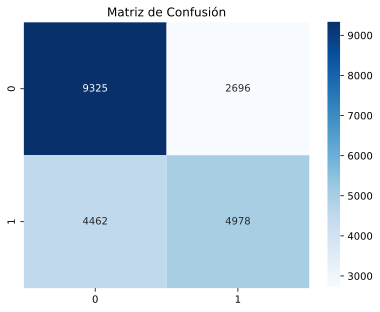

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X = df[[
    'region',
    'educa',
    'habituales',
    'efectivas',
    'categoria_ocupacion',
    'ocup_form',
    'proveedor',
    'parentesco',
    'hrs_diarias',
    'dias_sem',
    'hrs_sem',
    'grupoOcup_ciuo08',
    # 'empresaPaga_ciiu4',
    # 'empresaTrabaja_ciiu4',
    # 'empresaDueno_ciiu4',
]]

# Codificar las variables categóricas
X = pd.get_dummies(X, drop_first=True)

# Variable dependiente: Sexo (codificada como 0 y 1)
y = df['sexo']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las variables numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Predicciones
y_pred = logreg.predict(X_test_scaled)

# Evaluación del modelo
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Verosimilitud del modelo completo (LL_full)
LL_full = logreg.score(X_test_scaled, y_test)

# Verosimilitud del modelo nulo (LL_null)
# El modelo nulo predice siempre la clase más frecuente
y_null = np.full_like(y_test, fill_value=y_test.mode()[0])
LL_null = np.mean(y_null == y_test)

# Cálculo del pseudo-R^2 de McFadden
pseudo_r2 = 1 - (LL_full / LL_null)

print(f"\nMcFadden's Pseudo-R^2: {pseudo_r2:.4f}")

# Matriz de confusión visual
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()


MSE: 0.18831694724145237
R^2 Score: 0.23567736182801025


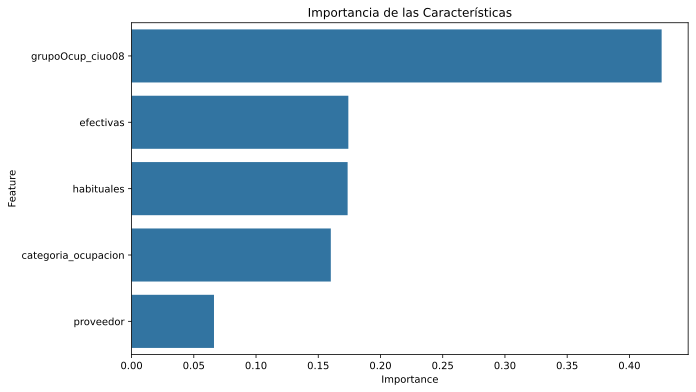

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Selección de columnas
X = df[[
    # 'region',
    # 'educa',
    'habituales',
    'efectivas',
    'categoria_ocupacion',
    # 'ocup_form',
    'proveedor',
    # 'parentesco',
    # 'hrs_diarias',
    # 'dias_sem',
    # 'hrs_sem',
    'grupoOcup_ciuo08',
    # 'empresaPaga_ciiu4',
    # 'empresaTrabaja_ciiu4',
    # 'empresaDueno_ciiu4',
]]

# Variable objetivo
y = df['sexo']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las variables numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo de Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predicciones
y_pred = rf.predict(X_test_scaled)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R^2 Score: {r2}")

# Visualización: Predicciones vs Valores Reales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

# Obtener probabilidades (importancia de las características)
importances = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualización de la importancia de las variables
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importancia de las Características')
plt.show()
